In [13]:
import torch
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer

import hnn_core
import os.path as opx
import matplotlib.pyplot as plt
import time
import numpy as np
from hnn_core import jones_2009_model, simulate_dipole, read_params
from hnn_core.network_models import add_erp_drives_to_jones_model
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

In [7]:
def hnn_simulator(parameter_set):
    
    net_sim = jones_2009_model()
    
    parameter_set1 = parameter_set[0]
    parameter_set2 = parameter_set[1]
    
    
    # your code here that updates "mu" or mean time of drives using parameter theta
    weights_ampa = {'L2_basket': 0.09, 'L2_pyramidal': 0.02, 
                'L5_basket': 0.2, 'L5_pyramidal': 8e-3}
    synaptic_delays = {'L2_basket': 0.1, 'L2_pyramidal': 0.1,
                   'L5_basket': 1.0, 'L5_pyramidal': 1.0}

    net_sim.add_evoked_drive(name='evprox1', mu=parameter_set1, sigma=parameter_set2, numspikes=1,
                     weights_ampa=weights_ampa, location='proximal',
                     synaptic_delays=synaptic_delays)
    
    dpl = simulate_dipole(net_sim, dt=0.5, tstop=170)

    return dpl[0].data['agg']

In [8]:
prior = utils.BoxUniform(low=[20, 0], high=[160, 30])

In [73]:
simulator, prior = prepare_for_sbi(hnn_simulator, prior)
inference = SNPE(prior)

theta, x = simulate_for_sbi(simulator, proposal=prior, num_simulations=1000, num_workers=8)

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...


Running 1000 simulations in 1000 batches.:   0%|          | 0/1000 [00:00<?, ?it/s]

--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.
--No graphics will be displayed.


Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Loading custom mechanism files from /Users/tianqicheng/opt/anaconda3/envs/2060/lib/python3.10/site-packages/hnn_core/mod/arm64/.libs/libnrnmech.so
Building the NEURON model
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1:

In [124]:
x.shape

torch.Size([1000, 341])

In [125]:
theta.shape

torch.Size([1000, 2])

In [76]:
# # save x, theta
# torch.save(x, 'x.pt')
# torch.save(theta, 'theta.pt')

In [9]:
# load x, theta
x = torch.load('x.pt')
theta = torch.load('theta.pt')

In [10]:
obv_random = np.random.random(341)
obv_zeros = torch.zeros(341)
obv_real = hnn_simulator((90, 15))

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Loading custom mechanism files from /Users/tianqicheng/opt/anaconda3/envs/2060/lib/python3.10/site-packages/hnn_core/mod/arm64/.libs/libnrnmech.so
Building the NEURON model
[Done]
Trial 1: 0.5 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...


In [21]:
observation_list = [obv_random, obv_zeros, obv_real]
obvName = ['random_obv', 'zeros_obv', 'real_obv']
num_sims_list = [10, 100, 1000]

## Generate 9 plots for different observations (random, zeros, real) and different num_simulations (10, 100, 1000)

 Neural network successfully converged after 43 epochs.

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 48 epochs.

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 40 epochs.

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 62 epochs.

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 57 epochs.

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 58 epochs.

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 30 epochs.

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 27 epochs.

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 28 epochs.

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

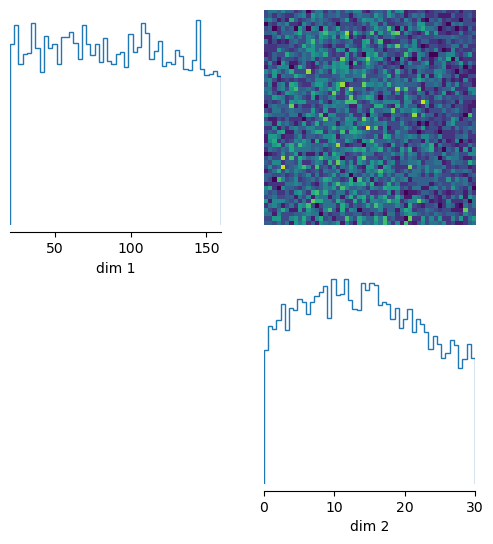

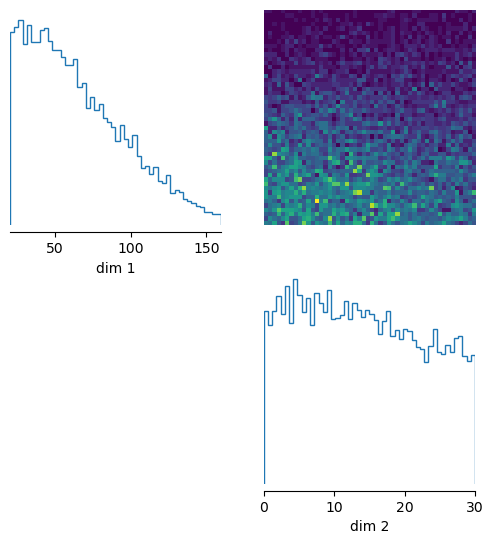

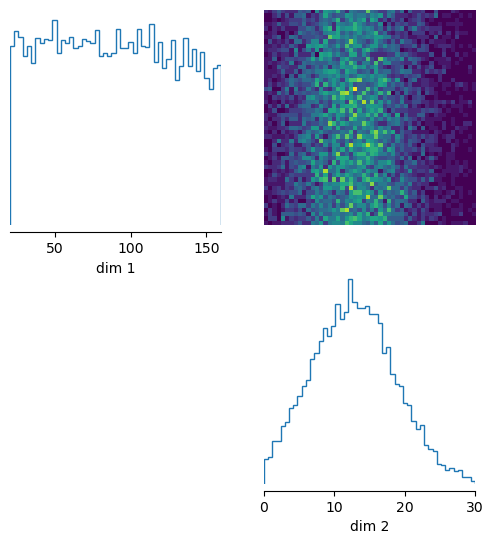

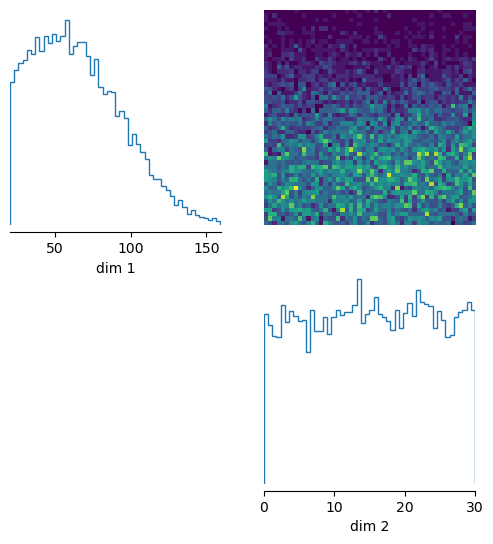

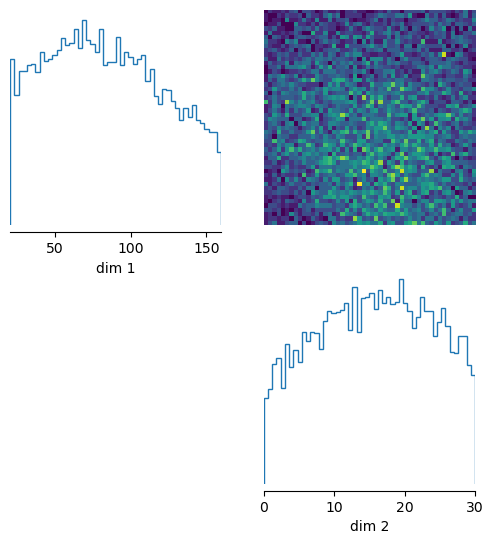

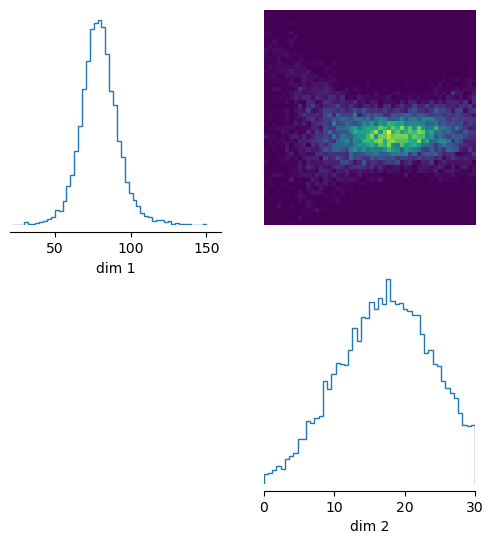

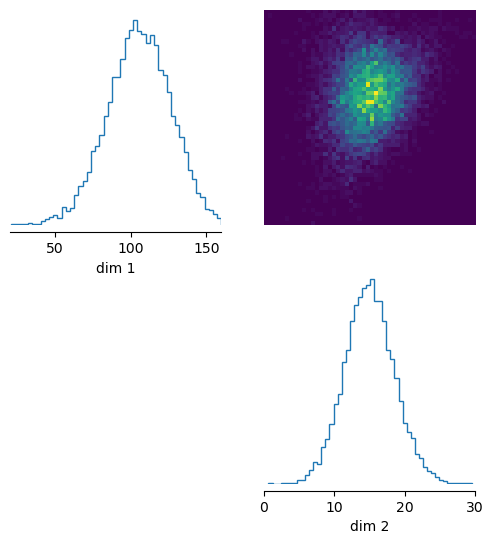

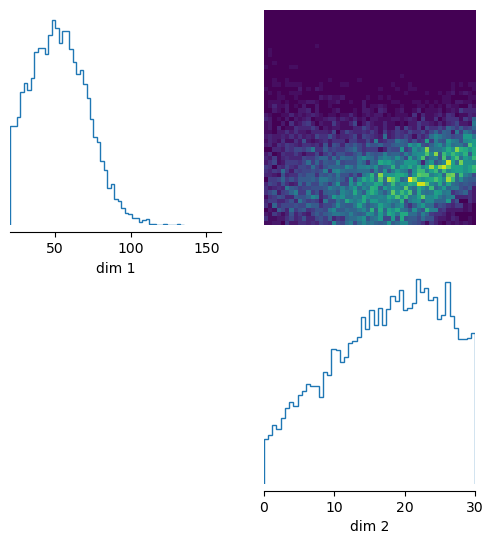

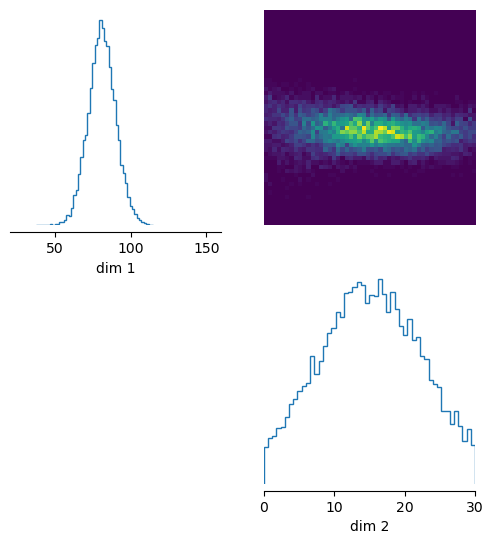

In [20]:
for num_sims in num_sims_list:
    for obv, obv_name in zip(observation_list, obvName):

        # train posterior
        inference = SNPE(prior)
        density_estimator = inference.append_simulations(theta[:num_sims, :], x[:num_sims, :]).train()
        posterior = inference.build_posterior(density_estimator)

        samples = posterior.sample((10000,), x=obv)
        log_probability = posterior.log_prob(samples, x=obv)
        _ = analysis.pairplot(samples, limits=[[20, 160], [0, 30]], figsize=(6, 6))
        
        plt.savefig(f'figures/num_sims_{num_sims}_obvtype_{obv_name}.png')
        # plt.close()